# Métodos de Machine Learning para Regressión

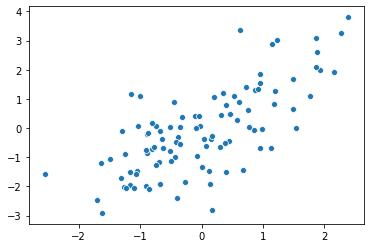

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor

# Generate Fake Data 
def generageData():
    np.random.seed(0)
    X = np.random.randn(100,2)
    beta = np.array([.9, -.3])
    e = np.random.randn(100,)
    Y = np.dot(X,beta.transpose()) + e
    return X, Y

X,Y = generageData()
sns.scatterplot(X[:,0], Y)
plt.show()

#### Mínimos Cuadrados Ordinarios

El modelo de minimos cuadrados ordinarios o MCO, ajusta un modelo lineal con coeficientes para minimizar la suma residual de cuadrados entre la variable dependiente y la esitmación de la misma predicha por la aproximación lineal. Matemáticamente resuelve un problema de la forma:

\begin{align}
y_i & = \sum_k \beta_kx_{ik} + \epsilon_i \\
RSS & = \left(\sum_i\left(y_i - \sum_k \beta_kx_{ik}\right)^2 \right) \\
\beta^* & = (X'X)^{-1}X'y
\end{align}



In [19]:
# Apply least square: https://scikit-learn.org/stable/modules/linear_model.html
reg = linear_model.LinearRegression()
reg.fit(X,Y)
reg.coef_
Y_hat_OLS = reg.predict(X)

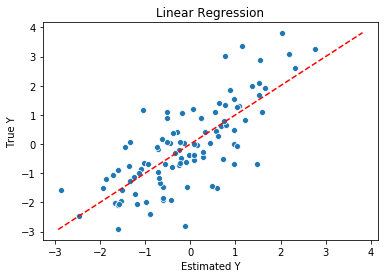

In [4]:
sns.scatterplot(Y_hat_OLS,Y)
plt.plot(np.linspace(Y.min(), Y.max(), 8),np.linspace(Y.min(), Y.max(), 8),color='red', linestyle='--')
plt.xlabel('Estimated Y')
plt.ylabel('True Y')
plt.title("Linear Regression")
plt.show()

#### Ridge Regression:

El model Ridge resuelve un modelo de regresión donde la función de pérdida es la función lineal de mínimos cuadrados y la regularización viene dada por la norma l2. 

\begin{align}
PRSS(\beta)_{r_{1}} & = \left(\mathbf{y} - \mathbf{X}\beta\right)^T\left(\mathbf{y} - \mathbf{X}\beta\right) + \lambda||\beta||^2_2 \\
\beta^{ridge}_{\lambda} & = (\mathbf{X}'\mathbf{X} + \lambda \mathbf{I}_p)^{-1}\mathbf{X}'\mathbf{y
}\end{align}


In [5]:
alpha0 = 0.2
reg = linear_model.Ridge(alpha=alpha0)
reg.fit(X,Y)
reg.coef_
Y_hat_Ridge = reg.predict(X)

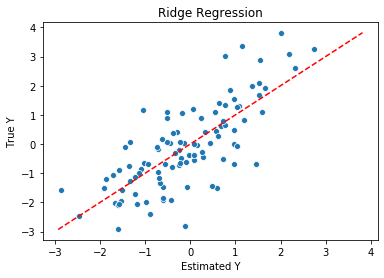

In [6]:
sns.scatterplot(Y_hat_Ridge,Y)
plt.plot(np.linspace(Y.min(), Y.max(), 8),np.linspace(Y.min(), Y.max(), 8),color='red', linestyle='--')
plt.xlabel('Estimated Y')
plt.ylabel('True Y')
plt.title("Ridge Regression")
plt.show()

#### Lasso Regression

El model Lasso resuelve un modelo de regresión donde la función de pérdida es la función lineal de mínimos cuadrados y la regularización viene dada por la norma l1. 

\begin{align}
PRSS(\beta)_{l_{1}} & = \left(\mathbf{y} - \mathbf{X}\beta\right)^T\left(\mathbf{y} - \mathbf{X}\beta\right) + \lambda||\beta||_1 \\
\beta^{lasso}_{\lambda} & = (\mathbf{X}'\mathbf{X} + \lambda \mathbf{I}_p)^{-1}\mathbf{X}'\mathbf{y
}\end{align}

In [20]:
alpha0 = 0.1
reg = linear_model.Lasso(alpha=alpha0)
reg.fit(X,Y)
reg.coef_
Y_hat_Lasso = reg.predict(X)

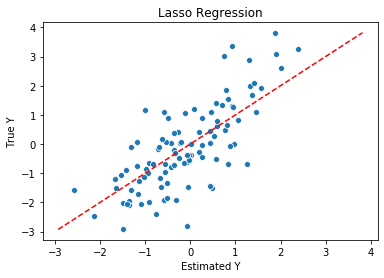

In [9]:
sns.scatterplot(Y_hat_Lasso,Y)
plt.plot(np.linspace(Y.min(), Y.max(), 8),np.linspace(Y.min(), Y.max(), 8),color='red', linestyle='--')
plt.xlabel('Estimated Y')
plt.ylabel('True Y')
plt.title("Lasso Regression")
plt.show()

#### KNN Regression

Las métricas de distancia pueden ser las siguientes:

\begin{align}
Euclidean & = \sqrt{\sum_{i=1}^k(x_i - y_i)^2} \\
Manhattan & = \sum_{i=1}^k \lvert x_i - y_i \rvert \\
Minkowski & = \left(\sqrt{\sum_{i=1}^k(|x_i - y_i|)^q}\right)^{1/q} 
\end{align}

In [18]:
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X, Y)
Y_hat_KNN = reg.predict(X)

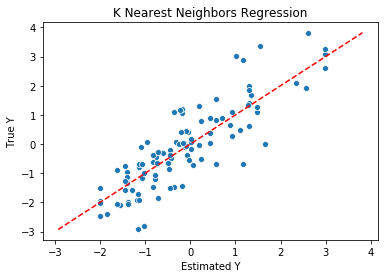

In [21]:
sns.scatterplot(Y_hat_KNN,Y)
plt.plot(np.linspace(Y.min(), Y.max(), 8),np.linspace(Y.min(), Y.max(), 8),color='red', linestyle='--')
plt.xlabel('Estimated Y')
plt.ylabel('True Y')
plt.title("K Nearest Neighbors Regression")
plt.show()

#### R-squared and MSE 


\begin{align}
MSE(\beta)_{l_{1}} & = \frac{1}{N}  \sum_i^N \left(y_i - y^*_i \right)^2 \\
TSE(\beta)_{l_{1}} & = \frac{1}{N}  \sum_i^N \left(y_i - \mu \right)^2 \\ 
R^2 & = 1-\frac{MSE}{TSE}
\end{align}



In [27]:
# R squared - MSE
def getMSE(Y, Y_hat):

    N = Y.shape[0]
    E = Y-Y_hat
    MSE = np.sum(E**2)/N

    return MSE

def getTSE(Y):

    N = Y.shape[0]
    E = Y-Y.mean()
    MSE = np.sum(E**2)/N

    return MSE

def getR2(Y, Y_hat):

    MSE = getMSE(Y, Y_hat)
    TSE = getTSE(Y)

    R2 = 1-MSE/TSE

    return R2

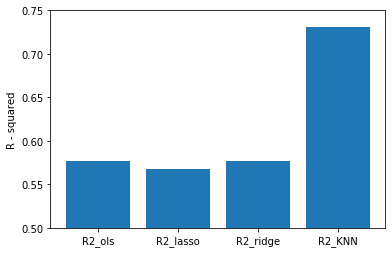

In [31]:
# MSE
MSE_ols = getMSE(Y, Y_hat_OLS)
MSE_lasso = getMSE(Y, Y_hat_Lasso)
MSE_ridge = getMSE(Y, Y_hat_Ridge)
MSE_KNN = getMSE(Y, Y_hat_KNN)

# R2
R2_ols = getR2(Y, Y_hat_OLS)
R2_lasso = getR2(Y, Y_hat_Lasso)
R2_ridge = getR2(Y, Y_hat_Ridge)
R2_KNN = getR2(Y, Y_hat_KNN)

# Plot:
plt.bar(('R2_ols', 'R2_lasso', 'R2_ridge', 'R2_KNN'),[R2_ols,R2_lasso,R2_ridge,R2_KNN])
plt.ylabel('R - squared')
plt.ylim([.5,.75])
plt.show()